In [20]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

print("="*60)
print("SUPERSTORE SALES ANALYSIS")
print("="*60)

#Loading Data
df = pd.read_csv('train.csv')
print(f" Data Loaded: {df.shape}")


#Create Database
conn = sqlite3.connect('superstore.db')
df.to_sql('Sales',conn,if_exists = 'append', index = False)
print('Database Created')

#Test Query
test = pd.read_sql("select * from Sales limit 5",conn)
print("Sql Working ")
test

SUPERSTORE SALES ANALYSIS
 Data Loaded: (9800, 18)
Database Created
Sql Working 


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [21]:
print("="*60)
print("SQL BUSINESS ANALYSIS")
print("="*60)
#Query1 Sales by Category
query1="""
    select Category,
        count(*) as Order_Count,
        round(sum(sales),2) as Total_Sales,
        round(avg(sales),2) as Avg_Order_Value
        from Sales
        group by  Category
        order by Total_Sales desc
        """

result1 = pd.read_sql(query1,conn)
print(result1)
print()

#Query2 Sales by Region
print("="*60)
print("SALES BY REGION")
print("="*60)

query2 = """
SELECT Region,
       COUNT(*) as Orders,
       ROUND(SUM(Sales), 2) as Total_Sales,
       ROUND(AVG(Sales), 2) as Avg_Sale
FROM sales
GROUP BY Region
ORDER BY Total_Sales DESC
"""

result2 = pd.read_sql(query2, conn)
print(result2)
print()

#Query3 Top 10 Customers
print("="*60)
print("Top 10 Customers")
print("="*60)


query3 = """
SELECT "Customer Name",
       ROUND(SUM(Sales), 2) AS Total_Sales
FROM sales
GROUP BY "Customer Name"
ORDER BY Total_Sales DESC
LIMIT 10
    """
result3 = pd.read_sql(query3, conn)
print(result3)
print()


# Query 4: Sales by Customer Segment
print("="*60)
print("SALES BY CUSTOMER SEGMENT")
print("="*60)

query4 = """
Select segment,
    count(*) as Orders,
    round(sum(sales),2) as Total_Sales,
    round(avg(sales),2) as Avg_Sales
    from sales
    group by segment 
    order by Total_Sales desc
"""

result4 = pd.read_sql(query4, conn)
print(result4)
print()



# Query 5: Top 10 Products
print("="*60)
print("TOP 10 PRODUCTS")
print("="*60)

query5 = """
SELECT "Product Name",
       COUNT(*) as Times_Sold,
       ROUND(SUM(Sales), 2) as Total_Revenue
FROM sales
GROUP BY "Product Name"
ORDER BY Total_Revenue DESC
LIMIT 10
"""

result5 = pd.read_sql(query5, conn)
print(result5)
print()


SQL BUSINESS ANALYSIS
          Category  Order_Count  Total_Sales  Avg_Order_Value
0       Technology         5439   2482367.62           456.40
1        Furniture         6234   2185975.73           350.65
2  Office Supplies        17727   2116267.00           119.38

SALES BY REGION
    Region  Orders  Total_Sales  Avg_Sale
0     West    9420   2130659.05    226.18
1     East    8355   2008556.18    240.40
2  Central    6831   1477940.74    216.36
3    South    4794   1167454.38    243.52

Top 10 Customers
        Customer Name  Total_Sales
0         Sean Miller     75129.15
1        Tamara Chand     57156.65
2        Raymond Buch     45352.02
3        Tom Ashbrook     43786.86
4       Adrian Barton     43420.71
5        Ken Lonsdale     42525.69
6        Sanjit Chand     42427.00
7        Hunter Lopez     38619.89
8        Sanjit Engle     36628.31
9  Christopher Conant     36387.22

SALES BY CUSTOMER SEGMENT
       Segment  Orders  Total_Sales  Avg_Sales
0     Consumer   15303   3

In [28]:
print("="*60)
print("TIME BASED ANALYSIS")
print("="*60)


#First, add date columns to sales table
print("Adding date columns to SQL..")
df['Order Date'] = pd.to_datetime(df['Order Date'],dayfirst=True)
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Quarter'] = df['Order Date'].dt.quarter
df['Month_Name'] = df['Order Date'].dt.strftime('%B')

df.to_sql('Sales',conn,if_exists = 'replace', index = False)
print('Data Columns added')
print()


# Query 6: Sales by Year
print("="*60)
print(" SALES BY YEAR")
print("="*60)

query6 = """
        Select year, 
        count(*) as orders,
        round(sum(sales),2) as total_annual_sales
        from sales
        group by year
        order by year
"""

result6= pd.read_sql(query6,conn)
print(result6)
print()

# Query 7: Sales by Quarter
print("="*60)
print(" SALES BY QUARTER")
print("="*60)

query7 = """
SELECT Year,
       Quarter,
       ROUND(SUM(Sales), 2) as Total_Sales
FROM sales
GROUP BY Year, Quarter
ORDER BY Year, Quarter
"""

result7 = pd.read_sql(query7, conn)
print(result7)
print()

# Query 8: Best and Worst Months
print("="*60)
print(" MONTHLY SALES PATTERN")
print("="*60)

query8 = """
SELECT Month_Name,
       Month,
       ROUND(AVG(Sales), 2) as Avg_Monthly_Sale,
       COUNT(*) as Total_Orders
FROM sales
GROUP BY Month_Name, Month
ORDER BY Month
"""

result8 = pd.read_sql(query8, conn)
print(result8)
print()

# Query 9: Top 5 States
print("="*60)
print(" TOP 5 STATES BY SALES")
print("="*60)

query9 = """
SELECT State,
       COUNT(*) as Orders,
       ROUND(SUM(Sales), 2) as Total_Sales
FROM sales
GROUP BY State
ORDER BY Total_Sales DESC
LIMIT 5
"""

result9 = pd.read_sql(query9, conn)
print(result9)
print()

# Query 10: Shipping Mode Analysis
print("="*60)
print("SALES BY SHIPPING MODE")
print("="*60)

query10 = """
SELECT "Ship Mode",
       COUNT(*) as Orders,
       ROUND(SUM(Sales), 2) as Total_Sales,
       ROUND(AVG(Sales), 2) as Avg_Order
FROM sales
GROUP BY "Ship Mode"
ORDER BY Total_Sales DESC
"""

result10 = pd.read_sql(query10, conn)
print(result10)
print()

print("Time analysis complete!")

TIME BASED ANALYSIS
Adding date columns to SQL..
Data Columns added

 SALES BY YEAR
   Year  orders  total_annual_sales
0  2015    1953           479856.21
1  2016    2055           459436.01
2  2017    2534           600192.55
3  2018    3258           722052.02

 SALES BY QUARTER
    Year  Quarter  Total_Sales
0   2015        1     73931.40
1   2015        2     85874.09
2   2015        3    142522.61
3   2015        4    177528.11
4   2016        1     62357.69
5   2016        2     87713.37
6   2016        3    128560.21
7   2016        4    180804.74
8   2017        1     92686.37
9   2017        2    135061.16
10  2017        3    138056.37
11  2017        4    234388.65
12  2018        1    122260.88
13  2018        2    127558.62
14  2018        3    193815.84
15  2018        4    278416.67

 MONTHLY SALES PATTERN
   Month_Name  Month  Avg_Monthly_Sale  Total_Orders
0     January      1            257.63           366
1    February      2            199.90           297
2      

In [ ]:
# KEY BUSINESS INSIGHTS:
#     BUSINESS IS GROWING
#     2015 - $479856.21
#     2016 - $459,436 (dip!)
#     2017 - $600192.55(recovery !)
#     2018 - $722052.02 (20% Profit)
#     Insight: After a dip in 2016 Business is growing 


# Sales By Quarter:
#     Every 4th Quarter of the year has maximum Sales 
#     2015 - $177528.11
#     2016 - $180804.74
#     2017 - $234388.65
#     2018 - $278416.67
# Insight: Holiday Shopping in Q4 - Black Friday, Christmas, New Year
# Business Action: Stock up the inventories before Q4
#                  Hire Seasonal staff
#                  Plan Marketing strategies and campaign before Q4

# CALIFORNIA IS THE KING!
# California: $446,306 (almost 2x New York!)
# New York: $306,361
# Texas: $168,572
# California alone = 20% of total sales!

# Business Action:
# Focus marketing in CA
# Study what works in CA, apply elsewhere

# CUSTOMERS PREFER STANDARD SHIPPING!
# Standard Class: 5,859 orders (60%!)
# Second Class: 1,902 orders
# First Class: 1,501 orders
# Same Day: 538 orders (only 5%)
                      
# Insight: Most people are not in a rush! They will wait for cheaper shipping.

    
# Business Action:
# Keep Standard shipping affordable
# Maybe offer "free standard shipping" promotions
# Same Day is a small category - do not invest heavily there


# THE BIG PICTURE STORY:
# Our business is healthy and growing! We're strongest in:

# Technology products
# West region (especially California)
# Consumer segment
# Q4 holiday season

# Our VIP customers like Sean Miller drive significant revenue, and most customers prefer affordable Standard shipping over speed.
# Key opportunity: Q4 generates 30-40% of annual sales. Better Q4 planning = bigger profits!


    
    



In [50]:
print("="*60)
print("VISUALIZATIONS")
PRINT("="*60

VISUALIZATIONS


Chart 1 : Sales By Category


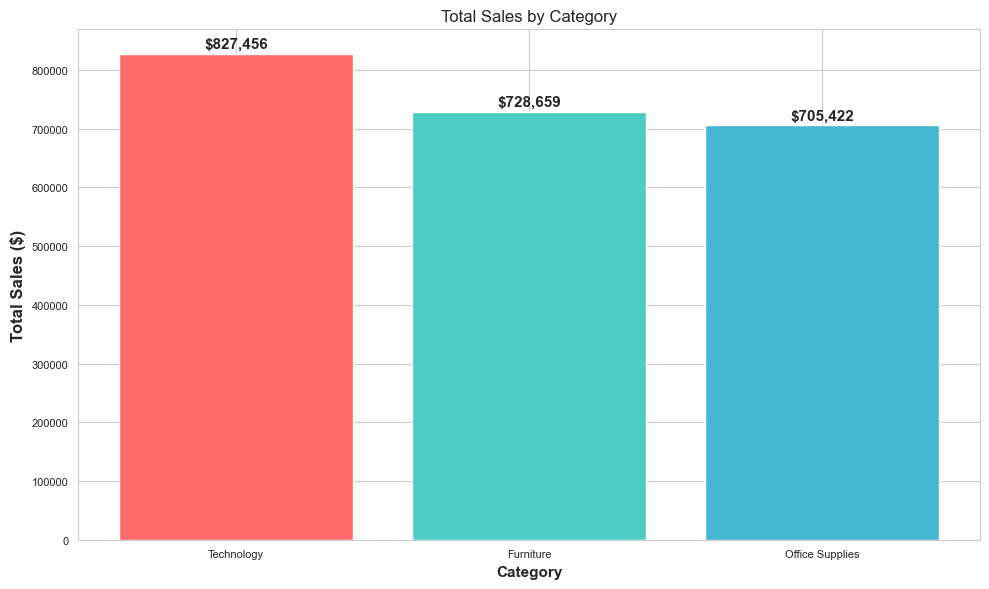

In [52]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12,6)
print("="*60)
print("Chart 1 : Sales By Category")
print("="*60)

category_data = pd.read_sql("""
    Select category,
    round(sum(sales),2) as Total_Sales
    from sales
    group by category
    order by Total_Sales desc""",conn)

plt.figure(figsize = (10,6))
plt.bar(
    category_data['Category'],
    category_data['Total_Sales'],
    color=['#FF6B6B', '#4ECDC4', '#45B7D1']
)
plt.title('Total Sales by Category') #fontsize=16, fontweight='bold')
plt.xlabel('Category',fontsize =11, fontweight = 'bold')
plt.ylabel('Total Sales ($)', fontsize=12,fontweight = 'bold')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# Add value labels on bars
for i, v in enumerate(category_data['Total_Sales']):
    plt.text(i, v + 10000, f'${v:,.0f}', ha='center', fontsize=11, fontweight='bold')
    plt.tight_layout()
plt.show()



In [53]:
print("="*60)
print("Chart 2: Sales Trend by Year")
print("="*60)

Chart 2: Sales Trend by Year


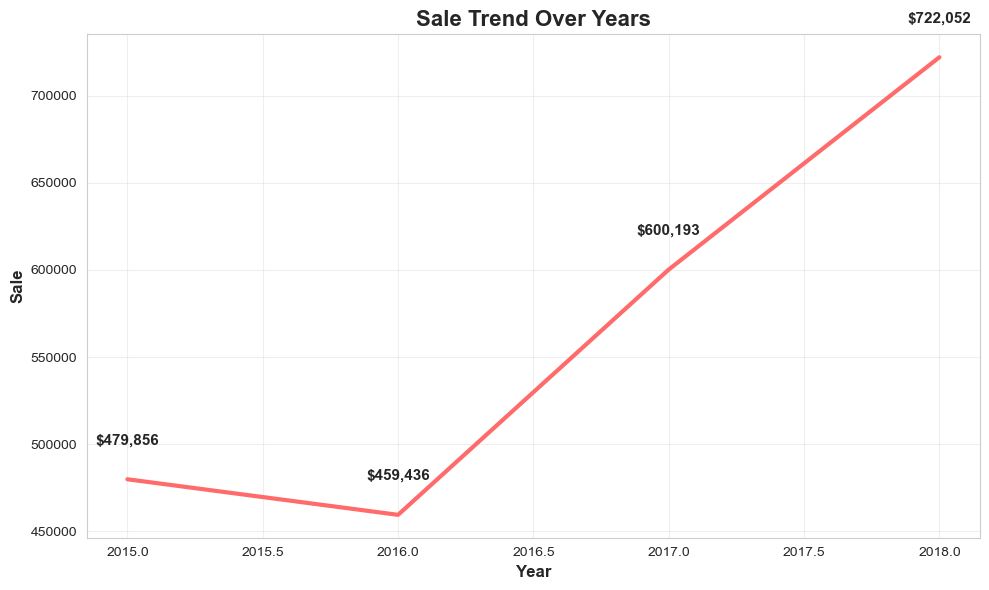

In [66]:
yearly_data = pd.read_sql("""
    SELECT Year, ROUND(SUM(Sales), 2) as Total_Sales
    FROM sales
    GROUP BY Year
    ORDER BY Year
""", conn)

plt.figure(figsize = (10,6))
plt.plot(yearly_data['Year'], yearly_data['Total_Sales'], marker = 'o', linewidth = 3, markersize = 0 , color = '#FF6B6B')
plt.title('Sale Trend Over Years',fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize =12, fontweight = 'bold')
plt.ylabel('Sale', fontsize = 12, fontweight = 'bold')
plt.grid(True, alpha = 0.3)
for x, y in zip(yearly_data['Year'], yearly_data['Total_Sales']):
    plt.text(x, y + 20000, f'${y:,.0f}', ha='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

Chart 3: Quarterly Sales Pattern
Pivot for better plotting


<Figure size 1200x600 with 0 Axes>

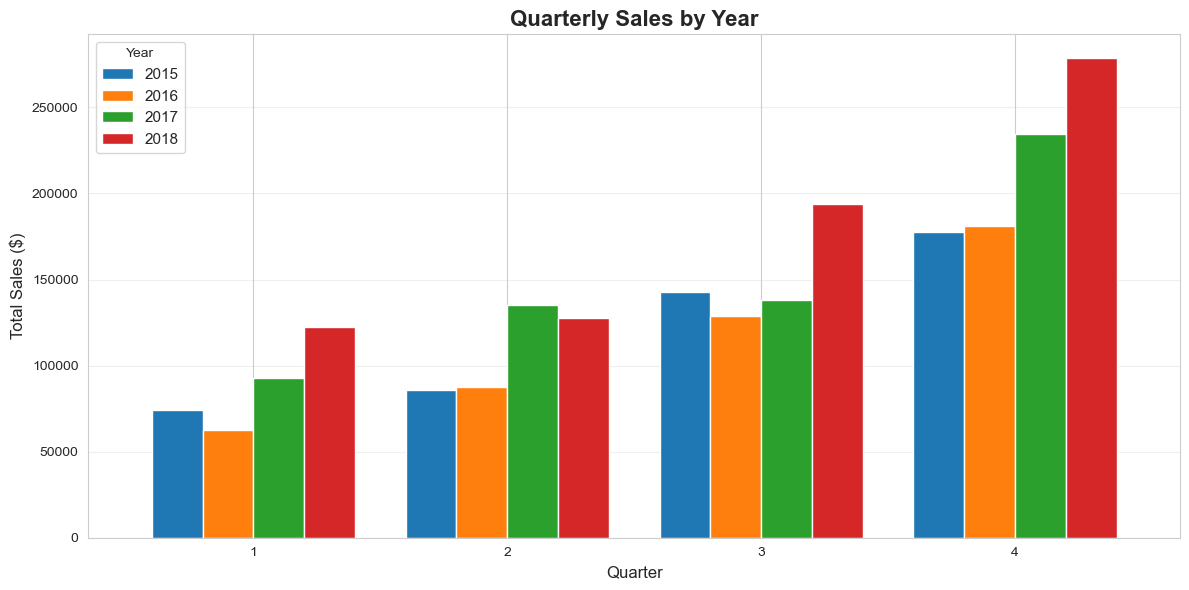

In [67]:
print("="*60)
print("Chart 3: Quarterly Sales Pattern")
print("="*60)

quarterly_data = pd.read_sql("""
    SELECT Year, Quarter, ROUND(SUM(Sales), 2) as Total_Sales
    FROM sales
    GROUP BY Year, Quarter
    ORDER BY Year, Quarter
""", conn)


print("Pivot for better plotting")
quarterly_pivot = quarterly_data.pivot(index='Quarter', columns='Year', values='Total_Sales')
plt.figure(figsize=(12, 6))
quarterly_pivot.plot(kind='bar', width=0.8)
plt.title('Quarterly Sales by Year', fontsize=16, fontweight='bold')
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.legend(title='Year', fontsize=11)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("="*60)
print("Chart 4:Top 10 States")
print("="*60)


state_data = pd.read_sql("""
    SELECT State, ROUND(SUM(Sales), 2) as Total_Sales
    FROM sales
    GROUP BY State
    ORDER BY Total_Sales DESC
    LIMIT 10
""", conn)

Chart 5:Customer Segment Distribution


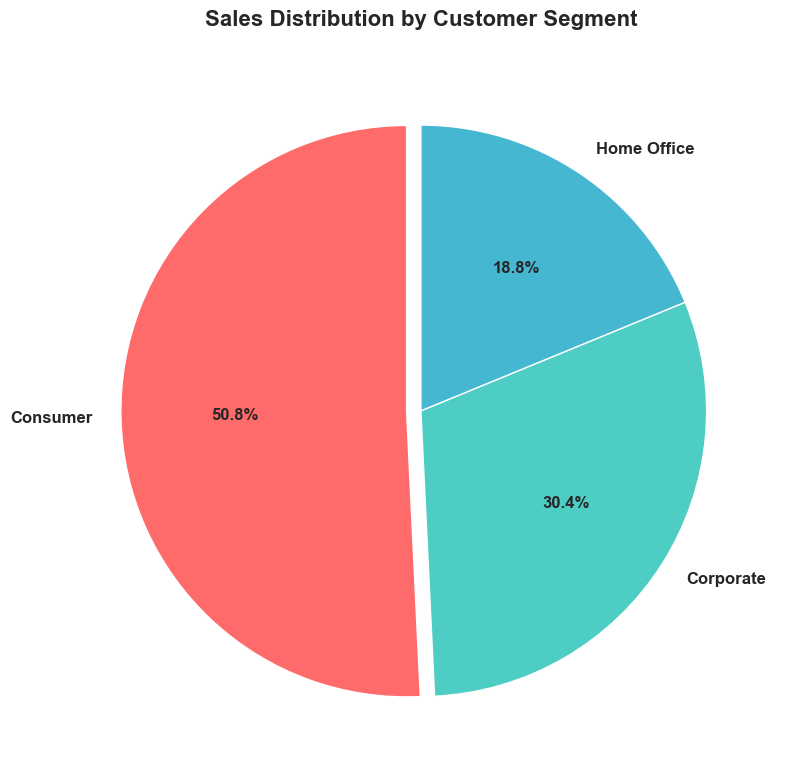

✅ Chart 5: Segment pie chart created!



In [69]:
print("="*60)
print("Chart 5:Customer Segment Distribution")
print("="*60)
segment_data = pd.read_sql("""
    SELECT Segment, ROUND(SUM(Sales), 2) as Total_Sales
    FROM sales
    GROUP BY Segment
""", conn)

plt.figure(figsize=(8, 8))
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
explode = (0.05, 0, 0)  # Explode the largest slice

plt.pie(segment_data['Total_Sales'], 
        labels=segment_data['Segment'], 
        autopct='%1.1f%%',
        colors=colors,
        explode=explode,
        startangle=90,
        textprops={'fontsize': 12, 'fontweight': 'bold'})

plt.title('Sales Distribution by Customer Segment', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()
print("✅ Chart 5: Segment pie chart created!")
print()
